# ALU using Qiskit

## This code demonstrates a basic ALU capable of various operations like:
1. Addition
2. Substraction
3. Multiplication
4. Division
5. Various Logical Operations(AND, OR, XOR and NOT)

In [13]:
print("Hi!")
print("This design implements ALU using Qiskit")

Hi!
This design implements ALU using Qiskit


## Importing the Qiskit Libraries

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer
import numpy as np

## Adding the various options and noises

In [3]:
# Options & Noise goes here - Don't change options variable name & block
options = {
    "rotation_error": {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]},
    "tsp_model_error": [1.0, 0.0],
    "thermal_factor": 1.0,
    "decoherence_factor": 1.0,
    "depolarization_factor": 1.0,
    "bell_depolarization_factor": 1.0,
    "decay_factor": 1.0,
}

## Creating the Quantum Circuit

In [4]:

# Create quantum and classical registers
q = QuantumRegister(10, 'q')
c = ClassicalRegister(10, 'c')  # Output registers

# Create quantum circuit
qc = QuantumCircuit(q, c)

## Defining the inputs and the operation to be perform

In [5]:
# Set inputs
input_1 = 5
input_2 = 3
operation = 'Multiplication'
# Convert inputs to binary strings
bin_input_1 = format(input_1, '03b')
bin_input_2 = format(input_2, '03b')

## Setting the input bits

In [6]:
# Set input bits
for i, bit in enumerate(bin_input_1):
    if bit == '1':
        qc.x(q[i + 2])  # Apply X gate to q[2] and q[3]
for i, bit in enumerate(bin_input_2):
    if bit == '1':
        qc.x(q[i + 4])  # Apply X gate to q[4] and q[5]

## Performing the ALU Operations

Here we are performing various ALU operations using the If-Else construct of python to choose a particular operation

In [7]:
# Perform ALU operations
# Addition
if(operation=='Addition'):
  qc.cx(q[3], q[0])  # Swap q[3] and q[0]
  qc.cx(q[4], q[0])  # XOR
  qc.ccx(q[3], q[4], q[0])  # AND

# Subtraction
elif(operation=='Subtraction'):
  qc.cx(q[3], q[1])  # Swap q[3] and q[1]
  qc.cx(q[4], q[1])  # XOR
  qc.x(q[4])  # NOT
  qc.ccx(q[3], q[4], q[1])  # AND
    

# Multiplication
elif(operation == 'Multiplication'):
  qc.cx(q[2], q[0])  # XOR
  qc.cx(q[2], q[1])  # XOR
    
# Division
elif(operation == 'Division'):
  qc.cx(q[2], q[3])  # XOR
  qc.x(q[3])  # NOT
  qc.ccx(q[3], q[2], q[4])  # AND


# XOR
elif(operation == 'XOR'):
  qc.cx(q[2], q[4])  # XOR
  qc.cx(q[3], q[4])  # XOR

# AND
elif(operation == 'AND'):
  qc.ccx(q[2], q[3], q[4])  # AND


# OR
elif(operation == 'OR'):
  qc.cx(q[2], q[4])  # XOR
  qc.cx(q[3], q[4])  # XOR
  qc.ccx(q[2], q[3], q[4])  # AND


# NOT
elif(operation == 'NOT'):
	qc.x(q[2])  # NOT

## Measuring the Output values

In [8]:


# Measure output bits
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[4], c[2])
qc.measure(q[2], c[3])



## Generating the output and density matrix

In [9]:
# Execute the circuit on the density matrix simulator
backend = BasicAer.get_backend('dm_simulator')
job = execute(qc, backend=backend, **options)
job_result = job.result()

# Print the density matrix of the final state
density_matrix = job_result.results[0].data.densitymatrix
print(density_matrix)

[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


## Drawing the Circuit

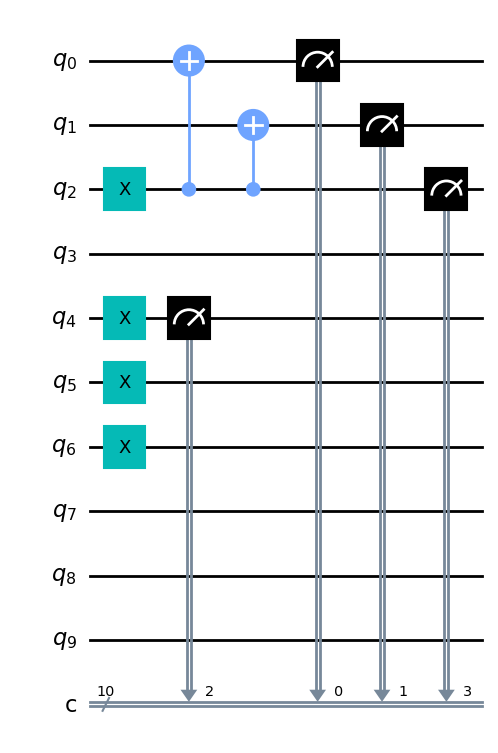

In [11]:
# Draw the circuit
qc.draw(output='mpl')



## Printing the Circuit

In [12]:
# Printing the circuit
print(qc)

           ┌───┐     ┌─┐      
 q_0: ─────┤ X ├─────┤M├──────
           └─┬─┘┌───┐└╥┘┌─┐   
 q_1: ───────┼──┤ X ├─╫─┤M├───
      ┌───┐  │  └─┬─┘ ║ └╥┘┌─┐
 q_2: ┤ X ├──■────■───╫──╫─┤M├
      └───┘           ║  ║ └╥┘
 q_3: ────────────────╫──╫──╫─
      ┌───┐ ┌─┐       ║  ║  ║ 
 q_4: ┤ X ├─┤M├───────╫──╫──╫─
      ├───┤ └╥┘       ║  ║  ║ 
 q_5: ┤ X ├──╫────────╫──╫──╫─
      ├───┤  ║        ║  ║  ║ 
 q_6: ┤ X ├──╫────────╫──╫──╫─
      └───┘  ║        ║  ║  ║ 
 q_7: ───────╫────────╫──╫──╫─
             ║        ║  ║  ║ 
 q_8: ───────╫────────╫──╫──╫─
             ║        ║  ║  ║ 
 q_9: ───────╫────────╫──╫──╫─
             ║        ║  ║  ║ 
c: 10/═══════╩════════╩══╩══╩═
             2        0  1  3 


# Thank You!